# Lemmatization
In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

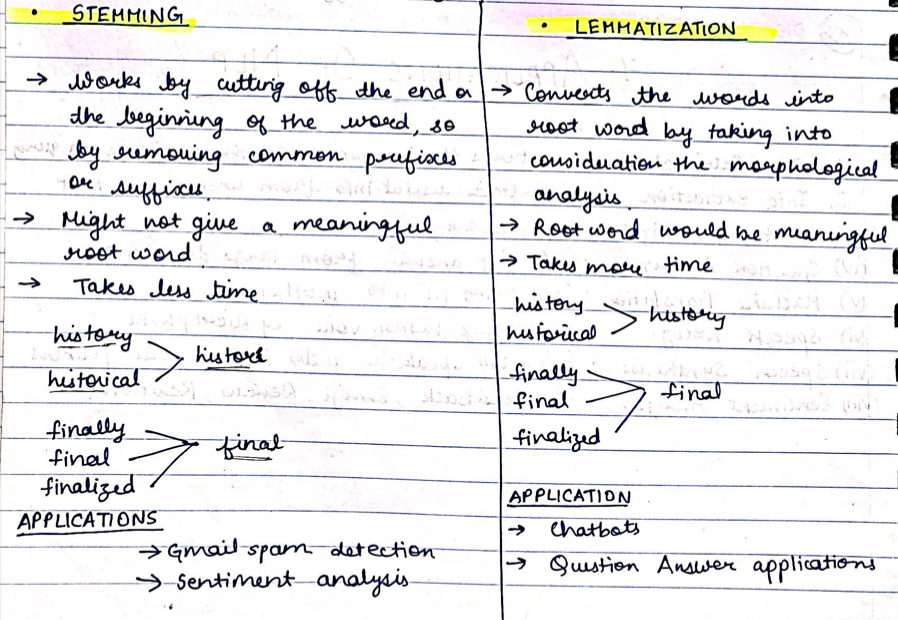

In [ ]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 VERB 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 ADP 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 ADP 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


<font color=green>In the above sentence, `running`, `run` and `ran` all point to the same lemma `run` (...11841) to avoid duplication.</font>

### Function to display lemmas
Since the display above is staggared and hard to read, let's write a function that displays the information we want more neatly.

In [ ]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Here we're using an **f-string** to format the printed text by setting minimum field widths and adding a left-align to the lemma hash value.

In [ ]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   561228191312463089     -PRON-
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


<font color=green>Notice that the lemma of `saw` is `see`, `mice` is the plural form of `mouse`, and yet `eighteen` is its own number, *not* an expanded form of `eight`.</font>

In [ ]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON   561228191312463089     -PRON-
am           VERB   10382539506755952630   be
meeting      VERB   6880656908171229526    meet
him          PRON   561228191312463089     -PRON-
tomorrow     NOUN   3573583789758258062    tomorrow
at           ADP    11667289587015813222   at
the          DET    7425985699627899538    the
meeting      NOUN   14798207169164081740   meeting
.            PUNCT  12646065887601541794   .


<font color=green>Here the lemma of `meeting` is determined by its Part of Speech tag.</font>

In [ ]:
doc4 = nlp(u"That's an enormous automobile")

show_lemmas(doc4)

That         DET    4380130941430378203    that
's           VERB   10382539506755952630   be
an           DET    15099054000809333061   an
enormous     ADJ    17917224542039855524   enormous
automobile   NOUN   7211811266693931283    automobile


<font color=green>Note that lemmatization does *not* reduce words to their most basic synonym - that is, `enormous` doesn't become `big` and `automobile` doesn't become `car`.</font>